<a href="https://colab.research.google.com/github/knownbymanoj/Machine_Learning/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron

In this notebook we ask you to implement a Perceptron using Numpy.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

We now generate an ad-hoc dataset for the task using Sklearn

In [ ]:
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)
print(y)

[1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1
 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1
 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0
 1 1]


As you can see, $y$ labels are $0$ or $1$. Let's turn the zeros into $-1$ to get us into the setting we saw in class

**EX 1.0** Modify the $y$ vector such that the labels are $\{-1,  1\}$ instead of $\{0, 1\}$. 

In [ ]:
# -------------SOLUTION--------------------
# 
 
y[y==0] = -1

# expected output of the command
print(y)
#[ 1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1 -1  1
#  1  1  1 -1  1 -1  1  1  1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1  1  1 -1 -1
# -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1  1 -1  1  1 -1  1
#  1  1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1  1  1 -1 -1  1  1  1 -1 -1
# -1  1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1
# -1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1 -1  1  1  1 -1  1 -1  1 -1 -1
# -1 -1  1 -1  1  1]


[ 1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1 -1  1
  1  1  1 -1  1 -1  1  1  1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1  1  1 -1 -1
 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1  1 -1  1  1 -1  1
  1  1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1  1  1 -1 -1  1  1  1 -1 -1
 -1  1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1 -1  1  1  1 -1  1 -1  1 -1 -1
 -1 -1  1 -1  1  1]


We also plot how the data looks like; in particular, we can see two different colours, one per class. 

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

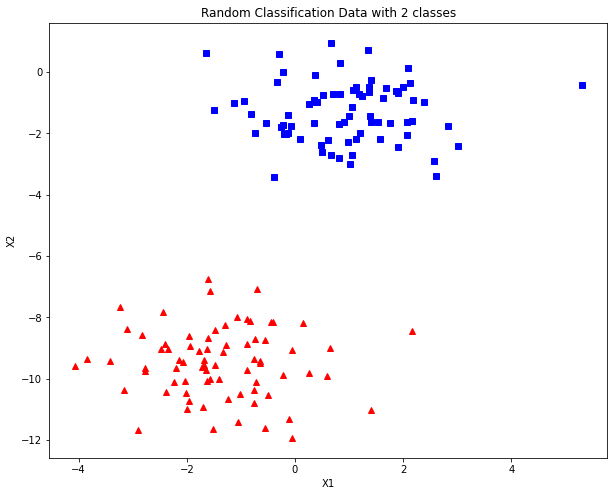

In [ ]:
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Random Classification Data with 2 classes')

Let's start to solve our exercise. <br>

**EX 1.1** create two variables m,n that represent the number of examples and the number of features, respectively. Get those values from X. 


In [ ]:
# -------------SOLUTION--------------------
m, n = X.shape
print(m, n) 

150 2


We now create a numpy array $\theta$ that contains the parameters of our perceptron. <br>

**EX 1.2** Create a numpy array *theta* filled with zero values (you should be able to determine the correct size). <br>


In [ ]:
# -------------SOLUTION--------------------
theta = np.zeros((n + 1, 1)) #we consider the +1 since we need to insert the bias as well
print(theta, theta.shape)

[[0.]
 [0.]
 [0.]] (3, 1)


Add the *bias* vector to $X$ as well: <br> 
**EX 1.3** create a new matrix $X_{mat}$ $(m , 3)$, where the first column is set to $1$, the second and third are our $X$. 

In [ ]:
# Expected output of the command 
# print(X_mat[:5, :])
# [[  1.          -0.53278301  -1.64847081]
# [  1.          -0.55022637 -11.61661524]
# [  1.           1.38862276  -1.4358059 ]
# [  1.           1.37033956  -0.64022071]
# [  1.          -0.88060639  -9.7094674 ]]

In [ ]:
# -------------SOLUTION--------------------
print(X[:5, :])
X_mat = np.hstack((np.ones((m, 1)), X))
print(X_mat[:5, :])

[[ -0.53278301  -1.64847081]
 [ -0.55022637 -11.61661524]
 [  1.38862276  -1.4358059 ]
 [  1.37033956  -0.64022071]
 [ -0.88060639  -9.7094674 ]]
[[  1.          -0.53278301  -1.64847081]
 [  1.          -0.55022637 -11.61661524]
 [  1.           1.38862276  -1.4358059 ]
 [  1.           1.37033956  -0.64022071]
 [  1.          -0.88060639  -9.7094674 ]]


It's time to train! <br>
**EX 1.4** Write a function called *perceptron_v1* that, given $X_{mat}$, $y$, $m$, and $\theta$, updates $\theta$ using the **perceptron** algorithm we saw in class during one of the previous lectures. <br>
The function returns the updated $\theta$ variable, and $y_{hat}$, a list of predicitons.

    #Example of how to return multiple variables
    def example(a, b):
        c = a + b
        d = a * b
        e = a / b
        f = a - b
        return c, d, e, f
    
    c, d, e, f = example(1, 2)


In [ ]:

# Expected output for the command
# print(theta) # to be invoked after executing the perceptron function
# [10.          1.4885954   1.69384333]

In [ ]:
# -------------SOLUTION--------------------
def sign(x):
  if x>0:
    return 1
  else:
    return -1

def perceptron_v1(X_mat, y, m, theta):
    #define an empty list 
    y_hat = []

    #we iterate over the samples
    for i in range(m):
        #get the current sample
        X_i = X_mat[i, :].reshape(1, 3)
        y_i = y[i]

        #predict the label of the ith-example
        pred = sign(X_i.dot(theta))

        #add the prediction into our list
        y_hat.append(pred) 

        #if the prediction is wrong, we update the samples
        if pred != y_i:
            theta += y_i*X_i.T
        
    return theta, y_hat

theta, y_pred = perceptron_v1(X_mat, y, m, theta)

print(theta)

[[10.        ]
 [ 1.4885954 ]
 [ 1.69384333]]


**EX 1.5** Define a function called *accuracy_score* that, given the ground truth and a vector of predictions, it returns the accuracy score. <br>
We define the accuracy as the number of correct predictions, divided by the total number of predictions. <br>
Calculate the accuracy score among the previous perceptron execution.

In [ ]:

# Expected output of the command
# print(accuracy_score(y, y_pred))
# 0.9066


In [ ]:
# -------------SOLUTION--------------------
#
# Ex 1.5: complete the solution here
#
def accuracy_score(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

print(accuracy_score(y, y_pred))


0.9066666666666666


Good job! We can finally plot the decision boundary obtained so far.

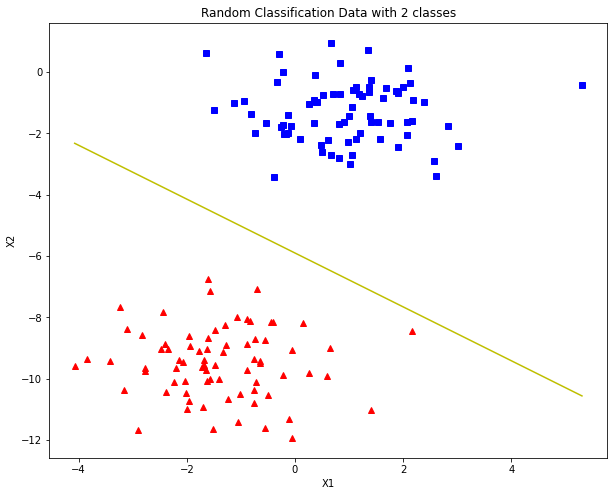

In [ ]:
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Random Classification Data with 2 classes')

# ADD THE DECISION BOUNDARY
# The Line is y=mx+c
x1 = np.array([min(X[:,0]), max(X[:,0])])
m = -theta[1]/theta[2]
c = -theta[0]/theta[2]
x2 = m * x1 + c
plt.plot(x1, x2, 'y-')